#veri setini anlamak kodu anlama ve kaynakları verimli yönetme noktasında çok önemlidiir sahip olduğumuz veri seti 4 farklı modaliteye sahipdir 
t1(t1-weighted) özellikle anatomiyi net gösterir beyin tümörünü doğrudan göstermektense tümör çevresindeki anatomik değişiklikleri gözlemlemek için kullanılır
t1ce(t1-weighted with contrast enhancement) tümörleri ve anormal bölgeleri vurgulamak kontrast made(gadolinum) adı verilir ve tümör gibi anormak dokular sayesinde parlak görünür tümörün aktif ve damar içeren kısımlarını belirlemek için çok kullanışlı bilgiler bu modaliteden alınır
t2-weighted sıvı içeren bölgeleri göstermek beyin omirilik ve ödem gibi sıvılar parlak görünür tümör çevresindeki ödem veya sıvı artışı bu modaliteyle kolayca fark edilir bu noktadaki değerli ve anlmalı bilgiler bu modalite sayesinde elde edilir
flair(fluid attenuated ınversion recovery) sıvıyı bastırarak ödem ve lezyonalar daha net görünür tümör çevresindeki ödem tespiti için çok kullanışlı anlamlı özellikler bu modelite ile elde edilir
Burda veri setimizin her modalitesinde kod kısmında yazarak da görücez 240 240 piksel yükseklik genişlik şeklinde birde her bir mrı görüntüsünün ilgi kısmında 155 tane slice var farklı kesitler var ve 0 1 2 4 şeklinde etiketlenmiş bir maske bilgisi içeriyor veri setimiz görüntülerimizi incelediğimizde arkada gereksiz bir arka plan piksel yoğunluğu var bunu modelin öğrenme ve iyi model elde edilmesi noktasında problem olacağı için bunu önlemek adına kod kısmında gösterceğimiz üzere bunları drop edip daha az pikselde(128X128)oluşan imageler elde edicez.her bir farkılı modalitedeki(kullanılan t1ce, t2, flaır) bu görseleri bir araya getirerek bu farklı 3 hacmi bir araya getirerek tek bir anlamlı hacim oluşturup bunu modele vereceğiz.Bizim için burda en önmeli olan bu görseleri modelin eğitim için anlayacağı dil olan numpy arraylere çevirmektir bunun sonucunda 128X128X128 lik bir küp elde ederiz 240X2400155 yapısının 128X128X128 yapılamsı elbetki 2^7'ye denk gelen bilinçli bir hareketir aynı zamanda zaman ve memory gibi fiziksle kaynaklar bakımından kar elde ederiz küpteki her bir en küçük birim olan küp üç sayısal değer seklinde bir numpy array 0.3 0.3 0.4 gibi örneğin etiket işlem sonunda flair yani 4 olarak işaretlenicek bu kiüpçük için bu şekilde model öğrenip kendi maske haritasını çıkarıcak gerçek değer ile farkı alınacak bu hata oranını vericek ardından bu hata geri yayılacak ve parametreler update yapılacak bu şekilde en doğru modeli elde edeceğiz

Şimdi burdaki bilgileri somut bir şekilde göreceğimiz kod kısmına geçelim

Öncelikle her bir modalitenin kaç boyutlu olduğunu yükseklik genişlik ve derinlik bilgilerini elde etmek için gerekli kodu yazdık.Ancak .nii uzantılı tıbbi görüntüleri okumak yazmak ve işlemek için kullanılan bit python kütüphanesi olan Nibabeli pip install nibabel diyip indirmek gerekir

  Cell In[5],   line 5
    patient_folder_path = "C:\Users\LENOVO\Desktop\dataset_1\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001"                  ^
SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: 
truncated \UXXXXXXXX escape
bu hatayı doğrudan windowstan kopyaladığın yol olarak yapıştırırsan python bu \ şekilde olan eğik çizgiyi özel karakter oalrak alır bunu engelemek için 
base_path = r"C:/Users/LENOVO/Desktop/dataset_1/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001" şekilnde r" " olarak yazarsın yada \ yerine \\ şeklinde kullanmalısın

In [55]:
import numpy as np
import nibabel as nib
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
scaler = MinMaxScaler()

In [59]:
import numpy as np
import nibabel as nib
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
scaler = MinMaxScaler()
#dosyanın içerdiği beş farklı uzantı bulunmakta olup sirayla herbirini listeden alıp uzantıya uygun bir şekilde ekrana bastıracaktır
modalities = ['flair', 't1', 't1ce', 't2', 'seg']
patient_folder_path = r"C:\Users\LENOVO\Desktop\dataset_1\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001"
for modality in modalities:
    spec_modalite_file_path = os.path.join(patient_folder_path, f"BraTS20_Training_001_{modality}.nii")
    img = nib.load(spec_modalite_file_path)
    data = img.get_fdata()
    print(f"{modality.upper()} numpy array versiyon boyut {data.shape} \n yükseklik: {data.shape[0]} \n genişlik: {data.shape[1]} \n derinlik: {data.shape[2]} \n max pixsel value of {modality}: {data.max()}")
    if(modality != 'seg'):
        print(f"scale numpy array of {modality} {scaler.fit_transform(data.reshape(-1,data.shape[-1])).reshape(data.shape)}")
    #Veriyi 8-bit formatına çevirir (etiket verileri için ideal)
    seg_data=data.astype(np.uint8)
    print(np.unique(seg_data))
    seg_data[seg_data == 4] = 3
    print(np.unique(seg_data))

FLAIR numpy array versiyon boyut (240, 240, 155) 
 yükseklik: 240 
 genişlik: 240 
 derinlik: 155 
 max pixsel value of flair: 625.0
scale numpy array of flair [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ..

veri setinin içindeki her bir modalitede durum bu şekilde biz ise bu 3d görüntilerin hepsini temsil eden tabiren big 3d yapıyı elde edicez ve bu yapıyı diskte modlein anlaycağı dil ollan numpy arrayler olarak tutacağız pikselerden oluşan bir image yerine.
Öncelikle her bir modalitenin kendi numpy arraylerini oluşturalım tabiki normalizasyon yapılmış numpy arreylerini kullanacağız
Bunun içinde scikit-learn kütüphanesinden sklearn.preprocessing modülünde yer alan MşnMacScaler sınıfının bir nesnesini kullanacağız bu nesne üzerinden fit_transform fonksiyonunu kullanacağız bu fonksiyon 2d boyutlu veri ister bu yüzden öncelikle 240X240X155'lik nump arraylerimizi 2d (240*240,155) versiyona çevirip bu versiyon üzerinden normalizasyon yapılıp ardından tekrar verilerimizi 3d formatına çeviricez
Bunu daha iyi anlamak için bir numpy array üzerinden örnek vererek aşama aşama gösterelim
array_3d = [
    [[10, 20, 30],
     [40, 50, 60]],
    [[70, 80, 90],
     [100, 110, 120]]
] bu 3d numpy arrayimiz ve bunu fit_tansform fonksiyonu ile normalize edicez bu fonksiyon 2d numpy array alır o yüzden önce 3d numpy arrayi 2d numpy arraye çeviren kodumuzu yazmamız gerekir
reshaped = array_3d.reshape(-1, array_3d.shape[-1]) 
.reshape fonksiyonu boyutu otomotik olarak hesapla diğerlerinden yola çıkarak demek örneğin(-1,3) dersek numpy elimdeki son hali ,3 olacak demek diyip buna göre hesaplama yapar
array_3d.shape → (2, 2, 3)  2 x 2 x 3 = 12 eleman içeriyor  reshaped = array_3d.reshape(-1, 3)  12 / 3 = 4  reshaped.shape → (4, 3)
yani reshape sonrası numpy array 
reshaped =
[
 [10, 20, 30],
 [40, 50, 60],
 [70, 80, 90],
 [100, 110, 120]
] shape=(2,3)
şeklinde olur.Görüldüğü gibi, 3D dizideki her bir 1x1x3 nokta (bir voxel), artık 2D dizide bir satır oldu. Bu, özellikle scaler gibi 2D giriş isteyen işlemler için süper kullanışlı
artık min-max normalize edilebilir
scaler = MinMaxScaler()
normalized = scaler.fit_transform(reshaped)
print("\nNormalized 2D:\n", normalized)
çıktı 
Normalized 2D:
[[0.   0.   0.  ]
 [0.25 0.25 0.25]
 [0.5  0.5  0.5 ]
 [0.75 0.75 0.75]]
 normalized_3d = normalized.reshape(array_3d.shape)
print("\nNormalized back to 3D:\n", normalized_3d)
print("Shape:", normalized_3d.shape)
Normalized back to 3D:
[[[0.   0.   0.  ]
  [0.25 0.25 0.25]]

 [[0.5  0.5  0.5 ]
  [0.75 0.75 0.75]]]
Shape: (2, 2, 3)
Yukardaki bu kısımları iyi anlamak için öncelikle reshape() fonksiyonun farklı parametre ve tarzlarını bilmek gerekiyor
öncelikle reshape bir numpy dizisinin şeklini(boyutlarını) veri sırasını bozmadan değiştirir temelde numpy.ndarray.reshape(*newshape)
reshape(2,3)denirse mevcut numpy arrayi 2 satır 3 sütün olucak şekilde yeniden düzenler
bir diğer parametremiz -1 sayısıdır otomotik hesapla numpy kalan boyutu kendisi bulur demektir
array = np.array([1, 2, 3, 4, 5, 6])  # 6 eleman 
array.reshape(2, 3)
[[1 2 3]
 [4 5 6]]
array.reshape(-1, 2)  # -1 NumPy'ye "kendin hesapla" der 2 sütün olacak şekilde boyutun kalan bilgisini buna göre hesapla demektir 6 tane varsa 2 sütün olursa X3 satır dan 6 tane elemana tekabül eder
[[1 2]
 [3 4]
 [5 6]]
array.reshape(1, 2, 3)
[
    [[1 2 3]],
    [[4 5 6]]
]
şeklinde ibr yapı görünür biz  ele manuel olarak değerleri girmektense(2X2X3) şeklinde  reshape(array_3d.shape) yaptık

    print(f"{modality.upper()} numpy array versiyon boyut {data.shape} \n yükseklik: {data.shape[0]} \n genişlik: {data.shape[1]} \n derinlik: {data.shape[2]} \n max pixsel value of {modality}: {data.max()} \n scale numpy array of {modality} {scaler.fit_transform(data.reshape(-1,data.shape[-1])).reshape(data.shape)}") bu kod satırıyla her bir modalitenin boyut bilgisini max piksle değerlerini ve normalize edilmiş numpy array'leri olarak ekrana bastırdık
    
0 1 2 3 şeklinde bir etiket beklentimiz yerine 0 1 2 4 şeklinde bir etiketleme var etiket numarası 4 olanları 3 olarak set edeceğiz


0 1 2 3 şeklinde bir etiket beklentimiz yerine 0 1 2 4 şeklinde bir etiketleme var etiket numarası 4 olanları 3 olarak set edeceğiz


In [ ]:
import numpy as np
import nibabel as nib
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
scaler = MinMaxScaler()

[0 1 2 4]
[0 1 2 3]
13


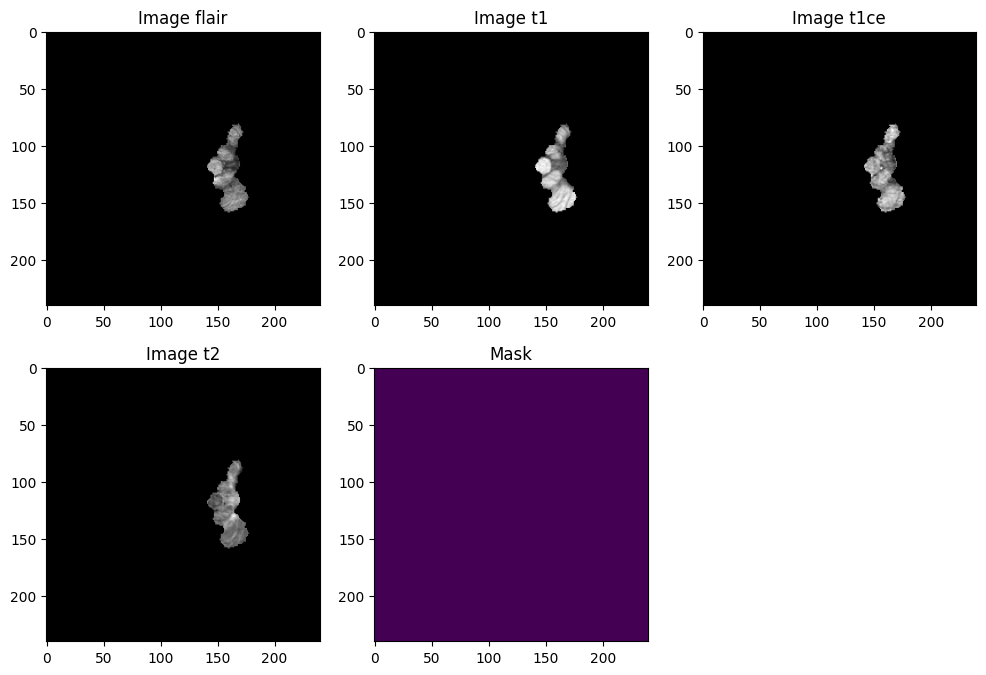

(240, 240, 155)


In [ ]:

import numpy as np
import nibabel as nib
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
scaler = MinMaxScaler()

PATH = r"C:\Users\LENOVO\Desktop\dataset_1\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001/"

np_flair = nib.load(PATH + "BraTS20_Training_001_flair.nii").get_fdata()
scale_flair = scaler.fit_transform(np_flair.reshape(-1,np_flair.shape[-1])).reshape(np_flair.shape)

np_t1 = nib.load(PATH + "BraTS20_Training_001_t1.nii").get_fdata()
scale_flair = scaler.fit_transform(np_flair.reshape(-1,np_flair.shape[-1])).reshape(np_flair.shape)

np_t1ce = nib.load(PATH + "BraTS20_Training_001_t1ce.nii").get_fdata()
scale_flair = scaler.fit_transform(np_flair.reshape(-1,np_flair.shape[-1])).reshape(np_flair.shape)

np_t2 = nib.load(PATH + "BraTS20_Training_001_t2.nii").get_fdata()
scale_flair = scaler.fit_transform(np_flair.reshape(-1,np_flair.shape[-1])).reshape(np_flair.shape)

#Veriyi 8-bit formatına çevirir (etiket verileri için ideal)
np_seg = nib.load(PATH + "BraTS20_Training_001_seg.nii").get_fdata()
np_seg=np_seg.astype(np.uint8)

print(np.unique(np_seg))
np_seg[np_seg == 4] = 3
print(np.unique(np_seg))

import random
#n_slice=random.randint(0, np_seg.shape[2])
n_slice=13
print(n_slice)

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(np_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(np_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(np_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(np_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(np_seg[:,:,n_slice])
plt.title('Mask')
plt.show()
print(np_seg.shape)


Rastgele sayılar üretip den k glen slşce'ları kerana bastırdığımızda ilk slaysların maskeleme olarak modelde eğiitm olarak tümörün yerini tespit etme olarak modeli eğitme noktasında anlamlı veriler olmadığını farkettik bu yüzden bu slice'leri attıp zaman ve kaynak bakımından kazanç elde etmiş oluruz bu yüzden bir takım configuration'lar yapılmalıdır veri setinde aynı zmanda yukarda da belirtildiği gibi t1'siz yola devam edeceğiz 

Öncelikle yapmamız gereken 3D MRI görüntülerini 4D boyutlu array(tensor) hale getirip her pozisyona voxel'e 3 modeliteyi birlikte verir
240 piksel yüksekliğinde
240 piksel genişliğinde
155 adet derinlik dilimi var (z-ekseni)
Ve her voxel için 3 farklı modalite (kanal) bilgisi var: FLAIR, T1CE, T2
Bu, derin öğrenme modelleri için çok ideal bir format. Çünkü modeller genellikle her voxel için birden fazla "kanal" bilgisi ister (tıpkı renkli görüntülerde RGB olması gibi).



cube = cube[56:184, 56:184, 13:141]
56:184 sayıları ile gereksiz arka plan bilgisini kısmen de olsa azaltık aynı zamanda veriyi modele eğitmek üzere verirken problem yaşamamak için slice'larıda 128 olacak şekilde kırptık

In [ ]:
print(np_seg.shape)
np_seg_scale = np_seg[56:184, 56:184, 13:141]

(128, 128, 128)


(128, 128, 128, 3)
(240, 240, 155)
(128, 128, 128)
99


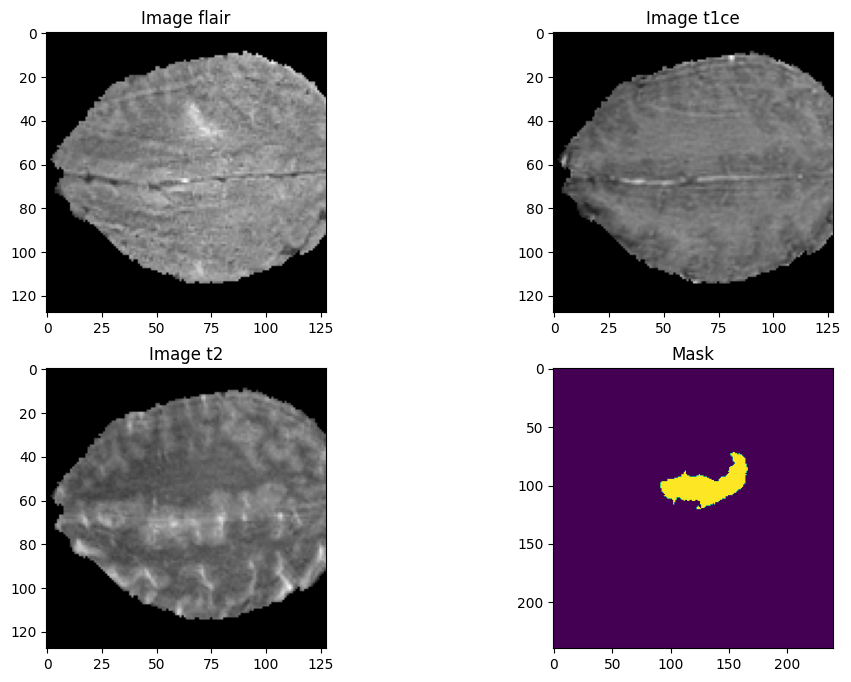

In [ ]:

cube = np.stack([np_flair, np_t1ce, np_t2], axis=3)
cube = cube[56:184, 56:184, 13:141]
print(cube.shape)
print(np_seg.shape)
np_seg_scale = np_seg[56:184, 56:184, 13:141]
print(np_seg_scale.shape)

n_slice=random.randint(0, np_seg_scale.shape[2])
n_slice = 99
print(n_slice)
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(cube[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(cube[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(cube[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(np_seg[:,:,n_slice])
plt.title('Mask')
plt.show()


Bizim için kullanışlı olan kısma kadar veriyi hazırladık ve en önemlisi onu modelin eğitileceği format olan numpy array olarak hazırladık şimdi bunu her defasında hard diskten image olarak temzilenmemiş numpy olmayan bir veri biçiminde almaktansa tabiki numpy array olarak almak daha hızlı ve bilgisayarda kullandığı depolama kaynağı bakımından da daha verimlidir

In [ ]:
path = r"C:\Users\LENOVO\Desktop\numpy_image/"
np.save(path + 'combined_001.npy', cube)

In [ ]:
path = r"C:\Users\LENOVO\Desktop\numpy_image/"
my_img_numpy_array=np.load(path + 'combined_001.npy')
print(my_img_numpy_array)



In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical
np_seg_scale = to_categorical(np_seg_scale, num_classes=4)
print(np_seg_scale)

Şu ana kadar olaya daha iyi hakim olmak ve süreci daha iyi yönetmek için tek bir görsel üzerinden yazdık kodlarımızı şimdi kod tarafında tek bütün hastaların bütün modalitelerini içe aktarıp gerekli işlemleri gerçekleştireceğim
t2_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))


In [ ]:
import glob
t2_list = sorted(glob.glob(r'C:\Users\LENOVO\Desktop\dataset_1\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob(r'C:\Users\LENOVO\Desktop\dataset_1\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob(r'C:\Users\LENOVO\Desktop\dataset_1\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob(r'C:\Users\LENOVO\Desktop\dataset_1\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData/*/*seg.nii'))
print(len(mask_list))

369


Kodun bu kısmında amacımız her bir hastanın 240X240X155 3D MRI verielrini yüklemektir

In [ ]:
import shutil

In [ ]:
for img in range(len(t2_list)):
    load_t2 = nib.load(t2_list[img]).get_fdata()
    load_t2 = scaler.fit_transform(load_t2.reshape(-1,load_t2.shape[-1])).reshape(load_t2.shape)

    load_t1ce = nib.load(t1ce_list[img]).get_fdata()
    load_t1ce = scaler.fit_transform(load_t1ce.reshape(-1,load_t1ce.shape[-1])).reshape(load_t1ce.shape)

    load_flair = nib.load(flair_list[img]).get_fdata()
    load_flair= scaler.fit_transform(load_flair.reshape(-1,load_flair.shape[-1])).reshape(load_flair.shape)
    
    load_mask = nib.load(mask_list[img]).get_fdata()
    load_mask = load_mask.astype(np.uint8)    
    load_mask[load_mask==4] = 3

    cube = np.stack([load_t2, load_t1ce, load_flair], axis=3)
    cube = cube[56:184, 56:184, 13:141]
    load_mask = load_mask[56:184, 56:184, 13:141]
    value, freq = np.unique(load_mask, return_counts=True)

    if (1 - (freq[0]/freq.sum())) > 0.01:
        print("This useful using for the best model")
        load_mask = to_categorical(load_mask, num_classes=4)
        np.save(r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_3channels\images/image_'+str(img)+'.npy', cube)
        np.save(r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_3channels\masks/mask_'+str(img)+'.npy', load_mask)
    else:
        print("This is unuseful training for the best model") 


import splitfolders 
input_folder  = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_3channels/'
output_folder = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128/'     
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values
shutil.make_archive(output_folder, 'zip', output_folder)
print(f" ZIP tamamlandı: {output_folder}.zip")


Önceki kod kısımlarında da olduğu gibi gördüğümde kafamda iyi canlanamsı adına cube şekliden ifade ettiğim yapıya çevireceğim

In [ ]:
'''cube = np.stack([load_t2, load_t1ce, load_flair], axis=3)
cube = cube[56:184, 56:184, 13:141]
load_mask = load_mask[56:184, 56:184, 13:141]'''

Şu ana kadar yaptıklarımızı tek bir hastanın 4 farklı modalitesi üzerinden önceden de yapmıştık şimdi  geldiğimiz nokta yine modeli gerekli verilerler meşgul edip gerreksiz verilerden ötürü yanlış öğrenemsini engeleme noktasındayız bu yüzden izleyeceğimiz yol her bir pikselin sahip olduğu unique değerleri almak ki bu 0,1,2,3 şeklinde değerler olucaktır bunları bir değişkende ardından unique olan bu her bir değerin frekansını tutuan başka bir değişken daha tanımlayacağız aslında yukardaki koda çalıştırırken görmüştük bazı maskeler gerçek analmada arka plandan başka bir anlam ifade etmiyordu tümörlü bölgeye dayir neredeyse hiç etiket yoktu bu şekildeki maskelerden kurtulmak için bir yötem belirliyoruz tümör etiketi alan piksel oransal olarak arka plan etiketi(0) içinde belirlenen yüzdenin altında kalıyorsa o maskeyi kaydetme diyoruz belirlenen oranımızdan büyükse o maskeyi kaydet diyoruz Şimdi bunun kodunu yazalım

In [ ]:
'''value, freq = np.unique(load_mask, return_counts=True)

if (1 - (freq[0]/freq.sum())) > 0.1:
    print("This useful using for the best model")
    load_mask = to_categorical(load_mask, num_classes=4)
    sample_folder_path = rf'C:\Users\LENOVO\Desktop\numpy_image\sample_{img}'
    np.save(os.path.join(sample_folder_path, 'image.npy'), cube)
    np.save(os.path.join(sample_folder_path, 'mask.npy'), load_mask)
else:
    print("This is unuseful training for the best model")       '''

In [ ]:
import splitfolders
input_folder = r'C:\Users\LENOVO\Desktop\numpy_image'
output_folder = r'C:\Users\LENOVO\Desktop\numpy_split'
splitfolders.ratio(
    input_folder, 
    output=output_folder, 
    seed=42, 
    ratio=(.75, .25), 
    group_prefix=None
)

BraTS2020 gibi büyük ve karmaşık veri setlerini RAM’e yüklemeden, batch halinde, doğru şekilde ve maske eşlemeleriyle birlikte eğitim sürecine dahil etmek.

Ama biz bunları birer birer değil, batch (küme) olarak modele vermek için topluca yüklüyoruz 
Bu yüzden images = np.array(images) ile tüm batch'i tek bir numpy array içinde birleştiriyoruz 
yield, eğitim sırasında her seferinde yeni bir batch döndürür.
imageLoader() bir generator fonksiyondur.
while True: döngüsü sayesinde, modelin ihtiyaç duyduğu sürece yeni batch’ler üretilir.
Bellek verimli kullanılır, her seferinde sadece bir batch belleğe alınır.



def load_img(img_dir, patient_folders_list):
    images = []
    for i, patient_name in enumerate(patient_folders_list):
        if(patient_name.split('.')[1] == 'npy'):
            pat_data = np.load(img_dir+patient_name)
            images.append(pat_data)
    images = np.array(images)
    return(images)

In [3]:

import os
import numpy as np

def load_img(img_dir, patient_folders_list):
    images = []
    for patient_name in patient_folders_list:    
        if patient_name.endswith('.npy'):
            full_path = os.path.join(img_dir, patient_name)  
            image = np.load(full_path)
            images.append(image)
    images = np.array(images)
    return images
'''import os
import numpy as np
def load_img(img_dir, patient_folders_list):
    images = []
    for i, patient_name in enumerate(patient_folders_list):    
        if patient_name.endswith('.npy'):
            full_path = os.path.join(img_dir, patient_name)  
            image = np.load(full_path)
            images.append(image)
    images = np.array(images)
    return images'''

"import os\nimport numpy as np\ndef load_img(img_dir, patient_folders_list):\n    images = []\n    for i, patient_name in enumerate(patient_folders_list):    \n        if patient_name.endswith('.npy'):\n            full_path = os.path.join(img_dir, patient_name)  \n            image = np.load(full_path)\n            images.append(image)\n    images = np.array(images)\n    return images"

In [6]:
import random

def imageLoader(img_dir, patient_folders_list, mask_dir, mask_list, batch_size, shuffle=True):
    L = len(patient_folders_list)

    while True:
        # Her epoch başında verileri karıştır
        if shuffle:
            combined = list(zip(patient_folders_list, mask_list))
            random.shuffle(combined)
            patient_folders_list[:], mask_list[:] = zip(*combined)

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            current_patients = patient_folders_list[batch_start:limit]
            current_masks    = mask_list[batch_start:limit]

            # Görüntüleri ve maskeleri doğru klasörlerden yükle
            X = load_img(img_dir, current_patients)
            Y = load_img(mask_dir, current_masks)

            yield (X, Y)

            batch_start += batch_size
            batch_end += batch_size


'''def imageLoader(img_dir, patient_folders_list, mask_dir, mask_list, batch_size):
    L = len(patient_folders_list)

    while True:
        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end,L)

            X = load_img(img_dir, patient_folders_list[batch_start:limit])
            Y = load_img(img_dir, patient_folders_list[batch_start:limit])

            yield(X,Y)

            batch_start += batch_size
            batch_end += batch_size
            '''

'def imageLoader(img_dir, patient_folders_list, mask_dir, mask_list, batch_size):\n    L = len(patient_folders_list)\n\n    while True:\n        batch_start = 0\n        batch_end = batch_size\n\n        while batch_start < L:\n            limit = min(batch_end,L)\n\n            X = load_img(img_dir, patient_folders_list[batch_start:limit])\n            Y = load_img(img_dir, patient_folders_list[batch_start:limit])\n\n            yield(X,Y)\n\n            batch_start += batch_size\n            batch_end += batch_size\n            '

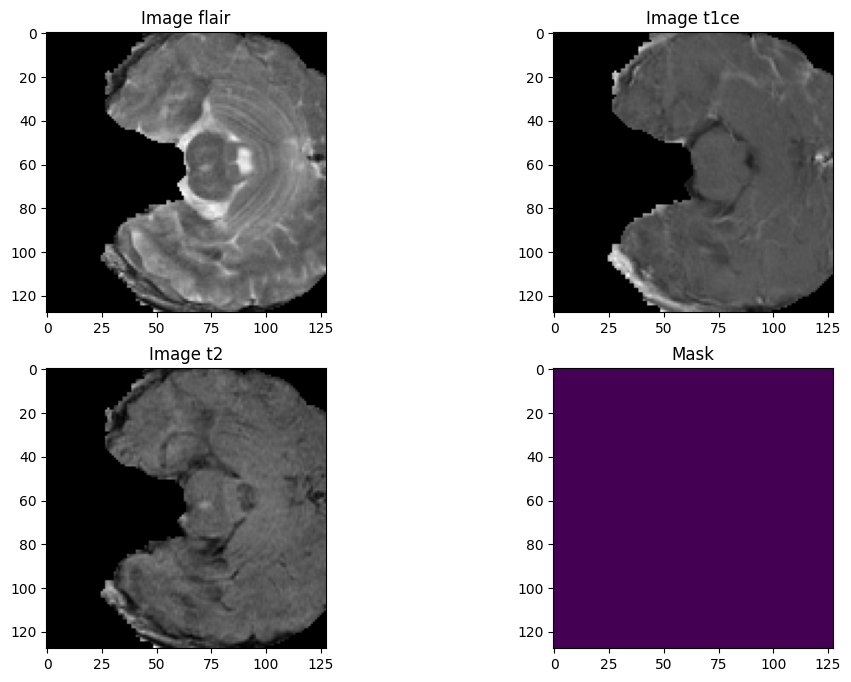

In [7]:
from matplotlib import pyplot as plt
import random
import os

train_img_dir  = r"C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\train\images"
train_mask_dir = r"C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\train\masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


In [ ]:
import numpy as np  
import tensorflow as tf  
from tensorflow.keras import layers, models  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.callbacks import EarlyStopping  
import matplotlib.pyplot as plt  
import os  

# U-Net Modeli  
def unet(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):  
    inputs = layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))  
    s = inputs   

    # Downsampling path  
    c1 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(s)  
    c1 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(c1)  
    p1 = layers.MaxPooling3D((2, 2, 2))(c1)  

    c2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(p1)  
    c2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(c2)  
    p2 = layers.MaxPooling3D((2, 2, 2))(c2)  

    c3 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(p2)  
    c3 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(c3)  
    p3 = layers.MaxPooling3D((2, 2, 2))(c3)  

    c4 = layers.Conv3D(512, (3, 3, 3), activation='relu', padding='same')(p3)  
    c4 = layers.Conv3D(512, (3, 3, 3), activation='relu', padding='same')(c4)  
    p4 = layers.MaxPooling3D((2, 2, 2))(c4)  

    c5 = layers.Conv3D(1024, (3, 3, 3), activation='relu', padding='same')(p4)  
    c5 = layers.Conv3D(1024, (3, 3, 3), activation='relu', padding='same')(c5)  

    # Upsampling path  
    u6 = layers.Conv3DTranspose(512, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)  
    u6 = layers.concatenate([u6, c4])  
    c6 = layers.Conv3D(512, (3, 3, 3), activation='relu', padding='same')(u6)  
    c6 = layers.Conv3D(512, (3, 3, 3), activation='relu', padding='same')(c6)  

    u7 = layers.Conv3DTranspose(256, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)  
    u7 = layers.concatenate([u7, c3])  
    c7 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(u7)  
    c7 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(c7)  

    u8 = layers.Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)  
    u8 = layers.concatenate([u8, c2])  
    c8 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(u8)  
    c8 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(c8)  

    u9 = layers.Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)  
    u9 = layers.concatenate([u9, c1])  
    c9 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(u9)  
    c9 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(c9)  

    outputs = layers.Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)  

    model = models.Model(inputs=[inputs], outputs=[outputs])  
    return model  

# Eğitim Verilerini Yükleme  
import numpy as np  
import os  

def load_data(images_dir, masks_dir):  
    images = os.listdir(images_dir)  
    masks = os.listdir(masks_dir) 
     
    image_arrays = []  
    for img in sorted(images):  
        try:  
            image = np.load(os.path.join(images_dir, img))  
            image_arrays.append(image)  
        except Exception as e:  
            print(f"{img} yüklenirken hata oluştu: {e}")  

    mask_arrays = []  
    for mask in sorted(masks):  
        try:  
            mask = np.load(os.path.join(masks_dir, mask))  
            mask_arrays.append(mask)  
        except Exception as e:  
            print(f"{mask} yüklenirken hata oluştu: {e}")  

    return np.array(image_arrays), np.array(mask_arrays)    

# Düzenlediğiniz dizin yolları  
train_images_dir = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\train\images'  
train_masks_dir = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\train\masks'  
val_images_dir = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\val\images'  
val_masks_dir = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\val\masks'  

# Eğitim ve doğrulama verilerini yükle  
X_train, y_train = load_data(train_images_dir, train_masks_dir)  
X_val, y_val = load_data(val_images_dir, val_masks_dir)  

# Model parametreleri  
IMG_HEIGHT = 128  
IMG_WIDTH = 128  
IMG_DEPTH = 128  
IMG_CHANNELS = 3  # 3 channel (T1, T2, FLAIR)  
num_classes = 4  

# Model oluşturma  
model = unet(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes)  

# Modelin derlenmesi  
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])  

# Early stopping  
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  

# Modeli eğitme  
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])  

# Eğitim sürecinde elde edilen kayıplar ve doğruluk değerleri  
plt.figure(figsize=(12, 4))  
# Kayıplar  
plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'], label='Train Loss')  
plt.plot(history.history['val_loss'], label='Validation Loss')  
plt.title('Loss')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.legend()  

# Doğruluk  
plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'], label='Train Accuracy')  
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  
plt.title('Accuracy')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy')  
plt.legend()  

plt.show()  

******************************************************************************************************************************************************************************************************************************************************************************

Ne yapabilirsin?
Eğer mutlaka sınıf 3'ün görselleşmesini istiyorsan, o zaman tüm hacmi tarayıp içinde 3 barındıran slice’ı seçebilirsin:
# 3 sınıfı içeren ilk slice'ı bul
for i in range(test_mask.shape[2]):
    if 3 in np.unique(test_mask[:, :, i]):
        n_slice = i
        break


from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import random
import os
import numpy as np

# Dosya yolları
train_img_dir  = r"C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\train\images"
train_mask_dir = r"C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_128\train\masks/"
train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

# Veri jeneratörü
train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

# Bir batch görüntü ve maskeyi al
img, msk = train_img_datagen.__next__()

# Rastgele bir örnek ve slice seç
img_num = random.randint(0, img.shape[0] - 1)
print("Seçilen hasta:", train_img_list[img_num])
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)  # one-hot'tan etiket maskeye dönüştür

n_slice = random.randint(0, test_mask.shape[2])

# 0,1,2,3 sınıflarına özel renkli maske görselleştirmesi
cmap = mcolors.ListedColormap(['black', 'red', 'green', 'yellow'])  # 0:background, 1:NCR, 2:Edema, 3:Enhancing Tumor
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Görüntüleme
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:, :, n_slice, 0], cmap='gray')
plt.title('Image flair')

plt.subplot(222)
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')
plt.title('Image t1ce')

plt.subplot(223)
plt.imshow(test_img[:, :, n_slice, 2], cmap='gray')
plt.title('Image t2')

plt.subplot(224)
im = plt.imshow(test_mask[:, :, n_slice], cmap=cmap, norm=norm)
plt.title('Mask (colored by class)')
plt.colorbar(im, ticks=[0, 1, 2, 3], label='Classes')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, Dropout
import tensorflow as tf

# 1. Giriş görüntüsünü yükle
input_path = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_3channels\images\image_0.npy'
img = np.load(input_path)  # (128, 128, 128, 3)
print("Input shape:", img.shape)

# 2. Girişin bazı slice’larını görselleştir
def show_slices(volume, title):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    mid_slices = [volume.shape[0]//2, volume.shape[1]//2, volume.shape[2]//2]
    axes[0].imshow(volume[mid_slices[0], :, :, 0], cmap='gray')
    axes[0].set_title('Sagittal (T2)')
    axes[1].imshow(volume[:, mid_slices[1], :, 1], cmap='gray')
    axes[1].set_title('Coronal (T1ce)')
    axes[2].imshow(volume[:, :, mid_slices[2], 2], cmap='gray')
    axes[2].set_title('Axial (FLAIR)')
    plt.suptitle(title)
    plt.show()

show_slices(img, title="Original Input (s)")

# 3. Contraction path modeli tanımla
def contraction_model():
    inputs = Input((128, 128, 128, 3))
    s = inputs

    c1 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(c5)

    model = Model(inputs=[inputs], outputs=[c5])
    return model

c_model = contraction_model()

# 4. Contraction path çıktısını al
img_input = np.expand_dims(img, axis=0)  # (1, 128, 128, 128, 3)
feature_output = c_model.predict(img_input)
print("Contraction path output shape:", feature_output.shape)  # örn. (1, 8, 8, 8, 256)

# 5. Feature map’leri görselleştir
def show_feature_maps(volume, title):
    volume = volume[0]  # batch dimension çıkar
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    for i in range(4):
        axes[i].imshow(volume[:, :, volume.shape[2]//2, i], cmap='viridis')
        axes[i].set_title(f'Feature Map {i}')
    plt.suptitle(title)
    plt.show()

show_feature_maps(feature_output, title="Feature Maps after Contraction Path (c5)")


import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv3D, MaxPooling3D, Dropout
from keras.models import Model

# Input yükle
input_path = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_3channels\images\image_0.npy'
img = np.load(input_path)
img = np.expand_dims(img, axis=0)  # (1, 128, 128, 128, 3)

# Model tanımı: layer layer işlenecek
inputs = Input((128, 128, 128, 3))
layer_outputs = []

c1 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(inputs)
layer_outputs.append(c1)
c1 = Dropout(0.1)(c1)
c1 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(c1)
layer_outputs.append(c1)
p1 = MaxPooling3D((2, 2, 2))(c1)

c2 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(p1)
layer_outputs.append(c2)
c2 = Dropout(0.1)(c2)
c2 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(c2)
layer_outputs.append(c2)
p2 = MaxPooling3D((2, 2, 2))(c2)

c3 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(p2)
layer_outputs.append(c3)
c3 = Dropout(0.2)(c3)
c3 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(c3)
layer_outputs.append(c3)
p3 = MaxPooling3D((2, 2, 2))(c3)

c4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(p3)
layer_outputs.append(c4)
c4 = Dropout(0.2)(c4)
c4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(c4)
layer_outputs.append(c4)
p4 = MaxPooling3D((2, 2, 2))(c4)

c5 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(p4)
layer_outputs.append(c5)
c5 = Dropout(0.3)(c5)
c5 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(c5)
layer_outputs.append(c5)

# Ara model (birden fazla çıktı verecek)
vis_model = Model(inputs=inputs, outputs=layer_outputs)
outputs = vis_model.predict(img)

# Görselleştir
def plot_feature_maps(output_list, titles):
    for out, name in zip(output_list, titles):
        print(f"{name} shape: {out.shape}")
        # 3D olduğu için ortasından 2D slice alıyoruz
        fmap = out[0]  # batch çıkar
        z = fmap.shape[2] // 2  # orta dilim (z)
        num_features = min(4, fmap.shape[-1])  # ilk 4 filtre
        fig, axes = plt.subplots(1, num_features, figsize=(16, 4))
        for i in range(num_features):
            axes[i].imshow(fmap[:, :, z, i], cmap='viridis')
            axes[i].set_title(f'{name} - FM {i}')
        plt.suptitle(f'{name} Feature Maps (middle slice)')
        plt.show()

layer_names = ["c1_1", "c1_2", "c2_1", "c2_2", "c3_1", "c3_2", "c4_1", "c4_2", "c5_1", "c5_2"]
plot_feature_maps(outputs, layer_names)


from keras.layers import Conv3DTranspose, concatenate
from keras.initializers import HeNormal

kernel_initializer = HeNormal()
expansive_outputs = []

# Expansive Path

# --- U6 ve C6 Katmanları ---
u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
expansive_outputs.append(u6)  # u6 output
u6 = concatenate([u6, c4])
c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
expansive_outputs.append(c6)
c6 = Dropout(0.2)(c6)
c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
expansive_outputs.append(c6)

# --- U7 ve C7 Katmanları ---
u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
expansive_outputs.append(u7)  # u7 output
u7 = concatenate([u7, c3])
c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
expansive_outputs.append(c7)
c7 = Dropout(0.2)(c7)
c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
expansive_outputs.append(c7)

# --- U8 ve C8 Katmanları ---
u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
expansive_outputs.append(u8)  # u8 output
u8 = concatenate([u8, c2])
c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
expansive_outputs.append(c8)
c8 = Dropout(0.1)(c8)
c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
expansive_outputs.append(c8)

# --- U9 ve C9 Katmanları ---
u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
expansive_outputs.append(u9)  # u9 output
u9 = concatenate([u9, c1])
c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
expansive_outputs.append(c9)
c9 = Dropout(0.1)(c9)
c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
expansive_outputs.append(c9)

# Visualization model for expansive path
vis_model_exp = Model(inputs=inputs, outputs=expansive_outputs)
outputs_exp = vis_model_exp.predict(img)

# Layer isimleri (u ve c'leri ayırt edelim)
exp_layer_names = [
    "u6", "c6_1", "c6_2",
    "u7", "c7_1", "c7_2",
    "u8", "c8_1", "c8_2",
    "u9", "c9_1", "c9_2"
]

# Aynı görselleştirme fonksiyonu
plot_feature_maps(outputs_exp, exp_layer_names)


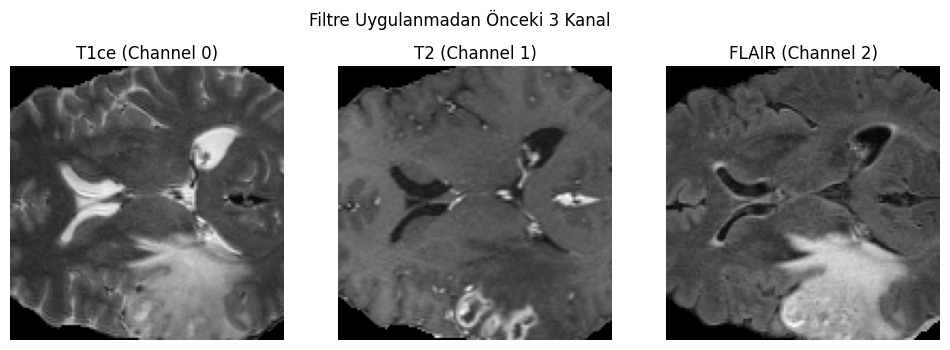

Kullanılan 3x3x3 Filtre:
 [[[ 0.49671415 -0.1382643   0.64768854]
  [ 1.52302986 -0.23415337 -0.23413696]
  [ 1.57921282  0.76743473 -0.46947439]]

 [[ 0.54256004 -0.46341769 -0.46572975]
  [ 0.24196227 -1.91328024 -1.72491783]
  [-0.56228753 -1.01283112  0.31424733]]

 [[-0.90802408 -1.4123037   1.46564877]
  [-0.2257763   0.0675282  -1.42474819]
  [-0.54438272  0.11092259 -1.15099358]]]


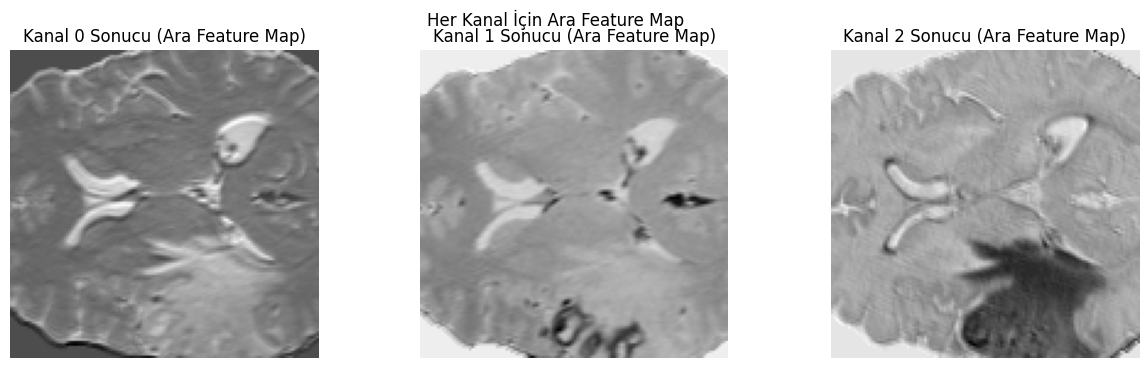

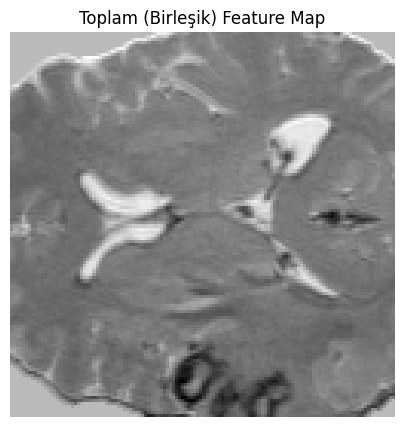

In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.signal

# Dosya yolu
input_path = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_3channels\images\image_16.npy'

# Veriyi yükle
data = np.load(input_path)  # shape: (128, 128, 128, 3)

# Ortadaki slice'ı seç (örneğin 64. slice)
selected_slice = data[:, :, 64, :]  # Z ekseninden bir kesit
 # shape: (128, 128, 3)

# ---------------------------
# Görselleştirme: Filtre öncesi
# ---------------------------
plt.figure(figsize=(12, 4))
titles = ['T1ce (Channel 0)', 'T2 (Channel 1)', 'FLAIR (Channel 2)']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(selected_slice[:, :, i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.suptitle("Filtre Uygulanmadan Önceki 3 Kanal")
plt.show()

# ---------------------------
# Rastgele 3x3x3 filtre oluştur
# ---------------------------
np.random.seed(42)
kernel_np = np.random.randn(3, 3, 3)  # shape: (3, 3, 3)
print("Kullanılan 3x3x3 Filtre:\n", kernel_np)

# ---------------------------
# Her kanala ayrı ayrı 3x3 filtre uygula ve ara sonuçları görselleştir
# ---------------------------
channel_outputs = []
plt.figure(figsize=(15, 4))
for i in range(3):
    channel = selected_slice[:, :, i]  # shape: (128, 128)
    filt = kernel_np[:, :, i]  # shape: (3, 3)
    filtered = scipy.signal.convolve2d(channel, filt, mode='valid')  # shape: (126, 126)
    channel_outputs.append(filtered)

    plt.subplot(1, 3, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Kanal {i} Sonucu (Ara Feature Map)')
    plt.axis('off')
plt.suptitle("Her Kanal İçin Ara Feature Map")
plt.show()

# ---------------------------
# Kanal çıktılarının toplamı (toplam feature map)
# ---------------------------
combined_feature_map = sum(channel_outputs)
plt.figure(figsize=(5, 5))
plt.imshow(combined_feature_map, cmap='gray')
plt.title("Toplam (Birleşik) Feature Map")
plt.axis('off')
plt.show()


# SOBEL FİLTRESİ

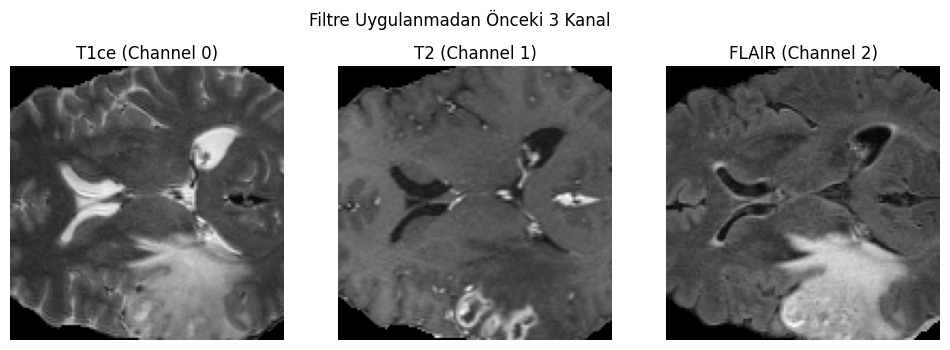

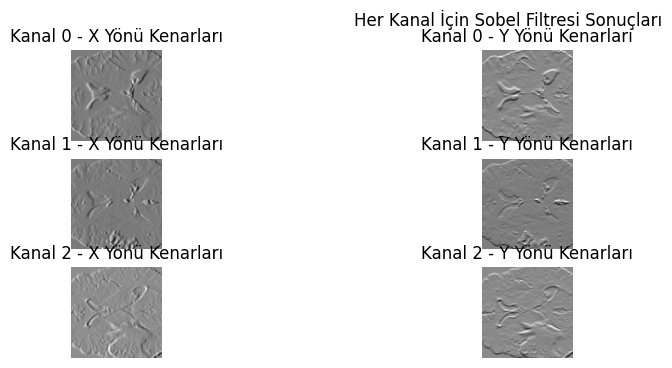

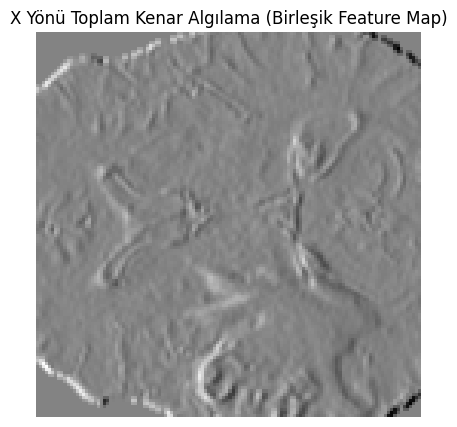

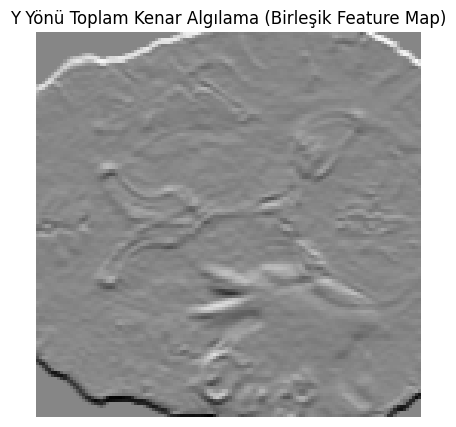

In [54]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.signal

# Dosya yolu
input_path = r'C:\Users\LENOVO\Desktop\BraST2020_TrainingData\input_data_3channels\images\image_16.npy'

# Veriyi yükle
data = np.load(input_path)  # shape: (128, 128, 128, 3)

# Ortadaki slice'ı seç (örneğin 64. slice)
selected_slice = data[:, :, 64, :]  # Z ekseninden bir kesit
 # shape: (128, 128, 3)

# ---------------------------
# Görselleştirme: Filtre öncesi
# ---------------------------
plt.figure(figsize=(12, 4))
titles = ['T1ce (Channel 0)', 'T2 (Channel 1)', 'FLAIR (Channel 2)']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(selected_slice[:, :, i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.suptitle("Filtre Uygulanmadan Önceki 3 Kanal")
plt.show()

# ---------------------------
# Sobel Filtresi (X ve Y yönü)
# ---------------------------
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # Sobel X filtresi
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Sobel Y filtresi

# Sobel filtresi her kanal için uygulanacak
channel_outputs_x = []
channel_outputs_y = []
plt.figure(figsize=(15, 4))

for i in range(3):
    channel = selected_slice[:, :, i]  # shape: (128, 128)

    # X eksenine yönelik Sobel filtresi uygula
    filtered_x = scipy.signal.convolve2d(channel, sobel_x, mode='valid', boundary='wrap')  # X yönü kenar algılama
    channel_outputs_x.append(filtered_x)

    # Y eksenine yönelik Sobel filtresi uygula
    filtered_y = scipy.signal.convolve2d(channel, sobel_y, mode='valid', boundary='wrap')  # Y yönü kenar algılama
    channel_outputs_y.append(filtered_y)

    # Görselleştirme: Her kanal için X ve Y yönündeki kenarları göster
    plt.subplot(3, 3, 3*i+1)
    plt.imshow(filtered_x, cmap='gray')
    plt.title(f'Kanal {i} - X Yönü Kenarları')
    plt.axis('off')

    plt.subplot(3, 3, 3*i+2)
    plt.imshow(filtered_y, cmap='gray')
    plt.title(f'Kanal {i} - Y Yönü Kenarları')
    plt.axis('off')

plt.suptitle("Her Kanal İçin Sobel Filtresi Sonuçları")
plt.show()

# ---------------------------
# Kanal çıktılarının toplamı (toplam feature map)
# ---------------------------
combined_feature_map_x = sum(channel_outputs_x)
combined_feature_map_y = sum(channel_outputs_y)

# Görselleştirme: X ve Y yönlerindeki kenarların birleşimi
plt.figure(figsize=(5, 5))
plt.imshow(combined_feature_map_x, cmap='gray')
plt.title("X Yönü Toplam Kenar Algılama (Birleşik Feature Map)")
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(combined_feature_map_y, cmap='gray')
plt.title("Y Yönü Toplam Kenar Algılama (Birleşik Feature Map)")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np  

# Rastgele bir 6x6x3x3 dizisi oluştur  
input_array = np.random.rand(6, 6, 3, 3)  #(satır,sütün,derinlik=slice sayısı,kanal sayısı)
print("Girdi Dizisi (6x6x3x3):")  
print(input_array)  

In [ ]:

# Rastgele bir 6x6x3x3 dizisi oluştur  
input_array = np.random.rand(6, 6, 3)  #(satır,sütün,derinlik=slice sayısı,kanal sayısı)
print("Girdi Dizisi (6x6x3x3):")  
print(input_array)